In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# create random weights of n x d
def create_random_weights(n, d):
    return np.random.rand(n, d)

weights = create_random_weights(100, 10) # will be replaced by actual test weights
weights.shape

(100, 10)

In [3]:
# create training data
def create_training_data(n, d):
    X = np.random.rand(n, d)
    y = np.random.rand(n)
    return X, y

data = create_training_data(100, 10) # will be replaced by actual training
data[0].shape, data[1].shape

((100, 10), (100,))

In [4]:
# create a function to calculate the loss
def calculate_loss(weights, X, y):
    predictions = np.dot(X, weights.T)
    loss = np.mean((predictions - y.reshape(-1, 1)) ** 2)
    return loss


In [5]:
# test the calculate_loss function
loss = calculate_loss(weights, data[0], data[1])
print(f"Calculated Loss: {loss}")

Calculated Loss: 5.055354123892973


In [6]:
# create a function to plot the loss
def plot_loss(losses):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(len(losses)), y=losses)
    plt.title('Loss Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

In [7]:
# create a forward pass function
def forward_pass(X, weights):
    return np.dot(X, weights.T)

In [8]:
# create a backward pass function using newtons method
def backward_pass(X, y, weights):
    predictions = forward_pass(X, weights)
    errors = predictions - y.reshape(-1, 1)
    gradients = np.dot(errors.T, X) / len(y)
    return gradients


In [9]:
# create a function to update weights
def update_weights(weights, gradients, learning_rate=0.01):
    return weights - learning_rate * gradients

In [10]:
# create a function to train the model
def train_model(X, y, weights, iterations=100, learning_rate=0.01):
    losses = []
    for i in range(iterations):
        gradients = backward_pass(X, y, weights)
        weights = update_weights(weights, gradients, learning_rate)
        loss = calculate_loss(weights, X, y)
        losses.append(loss)
        if i % 10 == 0:
            print(f"Iteration {i}, Loss: {loss}")
    return weights, losses

Iteration 0, Loss: 4.801487641765058
Iteration 10, Loss: 2.8832541438451353
Iteration 20, Loss: 1.7546781414945152
Iteration 30, Loss: 1.0904969200034689
Iteration 40, Loss: 0.6994283994769911
Iteration 50, Loss: 0.46898240632073174
Iteration 60, Loss: 0.3330050507397023
Iteration 70, Loss: 0.2525920860006133
Iteration 80, Loss: 0.20486435540514464
Iteration 90, Loss: 0.17636680927606718


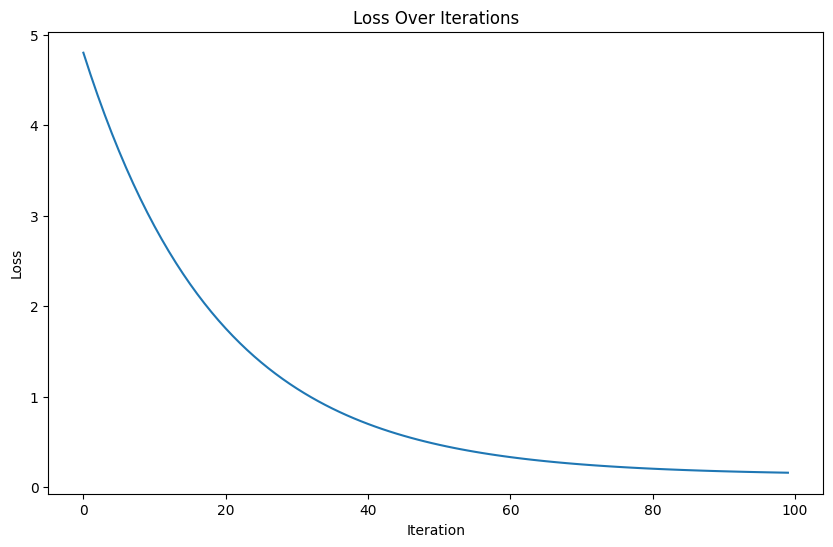

In [11]:
# train the model
trained_weights, losses = train_model(data[0], data[1], weights, iterations=100, learning_rate=0.01)
# plot the loss
plot_loss(losses)
# create a function to evaluate the model
def evaluate_model(X, y, weights):
    predictions = forward_pass(X, weights.T)
    loss = calculate_loss(weights.T, X, y)
    loss = np.mean(loss)
    print(f"Evaluation Loss: {loss}")
    return predictions

In [12]:
# print the weights
print("Trained Weights:")
print(trained_weights)

Trained Weights:
[[ 1.10248343e-01  4.00568424e-01  4.22866072e-01  4.50985999e-01
   3.02647082e-01  2.36571784e-01 -2.83962918e-01 -3.42240606e-01
   1.98084503e-03 -2.03832261e-01]
 [ 3.20890887e-01 -3.85579306e-01  2.47510938e-01  2.35007170e-01
  -8.98480485e-02  3.42297082e-01  3.99097487e-01  3.43921874e-01
   2.62512245e-01 -3.68387862e-01]
 [-5.11859456e-02  2.76972892e-01  2.47353320e-01  2.18185709e-01
  -4.03290191e-01  2.91445667e-01  2.41197686e-01 -8.10607759e-02
   3.73700435e-01  1.17693378e-01]
 [ 3.79962503e-02  2.35993252e-01 -1.16887465e-01  3.28201601e-01
   7.64873281e-02 -2.80666001e-02 -1.48649022e-01  3.28344637e-01
   3.47170908e-01  4.93912257e-02]
 [ 5.10590661e-01 -1.44057891e-01  1.87835893e-01 -2.17160755e-01
   5.15620713e-01 -2.32298100e-01 -3.44952748e-02  2.57225789e-01
   2.80595949e-01 -7.81089218e-03]
 [ 3.77350975e-01 -5.36328448e-02  1.45806944e-01 -1.85542033e-01
   3.42308899e-01 -1.66850836e-02 -2.06462645e-01  1.01620264e-01
   4.69018719e-0

In [13]:
# wrap the training inside a function
losses = [] # for plotting later
def linearRegression(X: np.array, Y: np.array, lr: float, lambda_: float):
    n_samples, n_features = X.shape
    # weights = np.zeros((n_features, 1))
    weights = np.random.rand(n_features, 1)  # Initialize weights randomly

    for i in range(100):  # number of iterations
        # predictions = forward_pass(X, weights)
        predictions = np.dot(X, weights)
        errors = predictions - Y.reshape(-1, 1)
        gradients = (2 / n_samples) * np.dot(X.T, errors) + lambda_ * weights
        weights -= lr * gradients
        # loss = calculate_loss(weights, X, Y)
        loss = np.mean(errors ** 2) + lambda_ * np.sum(weights ** 2)
        losses.append(loss)

        if i % 10 == 0:
            print(f"Iteration {i}, Loss: {loss}")

    return weights

Iteration 0, Loss: 5.463842609491825
Iteration 10, Loss: 1.9896733410387177
Iteration 20, Loss: 0.8214219250161907
Iteration 30, Loss: 0.4245065354718951
Iteration 40, Loss: 0.28613857725056724
Iteration 50, Loss: 0.23480894264398397
Iteration 60, Loss: 0.21305892030868512
Iteration 70, Loss: 0.20158022782018564
Iteration 80, Loss: 0.1938473890668284
Iteration 90, Loss: 0.18763046031631847


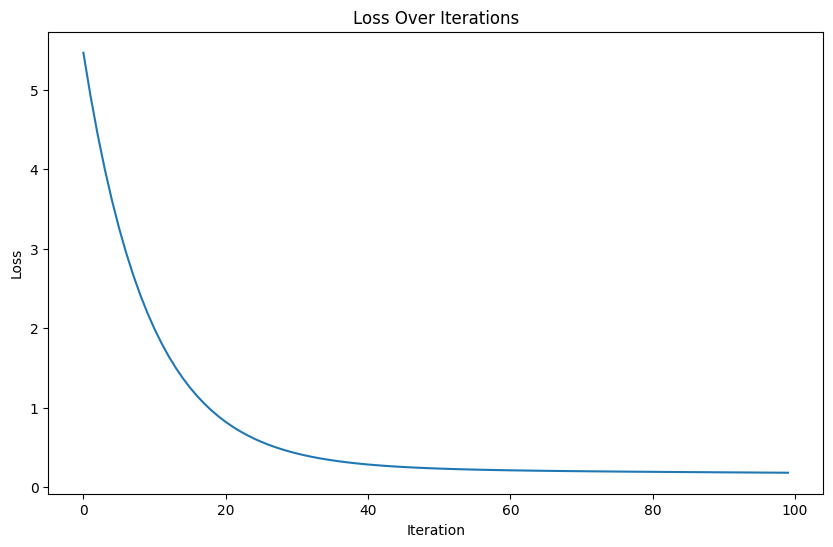

Evaluation Loss: 0.1264810900150028
Predictions:
[[ 0.22016634]
 [ 0.48940141]
 [ 0.6475236 ]
 [ 0.4467911 ]
 [ 0.49251236]
 [ 0.42434014]
 [ 0.53217808]
 [ 0.10285734]
 [ 0.55072343]
 [ 0.15006227]
 [ 0.43720325]
 [ 0.54894491]
 [ 0.7105358 ]
 [ 0.56024729]
 [ 0.40971657]
 [ 0.80132903]
 [ 0.14644114]
 [ 0.3092753 ]
 [ 0.70745176]
 [ 0.24427515]
 [ 0.13061478]
 [ 0.41089012]
 [ 0.30939466]
 [ 0.42410853]
 [ 0.38860878]
 [ 0.73348346]
 [ 0.35490567]
 [ 0.44419171]
 [ 0.66256904]
 [ 0.69211395]
 [ 0.00725708]
 [ 0.81418555]
 [ 0.25321961]
 [ 0.44196447]
 [ 0.56012378]
 [ 0.09229076]
 [ 0.61524976]
 [ 0.43121202]
 [ 0.73093458]
 [ 0.49425102]
 [ 0.54370716]
 [ 0.64776538]
 [ 0.62387304]
 [ 0.52852197]
 [ 0.22132344]
 [ 0.43206729]
 [ 0.60397732]
 [ 0.56391756]
 [ 0.55106321]
 [ 0.63338071]
 [ 0.47497295]
 [-0.05965864]
 [ 0.77461502]
 [ 0.23471502]
 [ 0.24272855]
 [ 0.58404118]
 [ 0.27749782]
 [ 0.41881864]
 [ 0.32348605]
 [ 0.32758102]
 [ 0.55254302]
 [ 0.24466308]
 [ 0.19249021]
 [ 0.4

In [14]:
# test the linearRegression function
lr = 0.01
lambda_ = 0.1 # regularization parameter
trained_weights = linearRegression(data[0], data[1], lr, lambda_)
# plot the loss for linear regression
plot_loss(losses)
# evaluate the model
predictions = evaluate_model(data[0], data[1], trained_weights)
# print the predictions
print("Predictions:")
print(predictions)